<center><H1 style = "color: green">GERMAN CREDIT RISK ANALYSIS</H1> </center>

***

## Contents

German Credit Dataset
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load 'german_credit_data.csv' and store it in a dataframe

In [3]:
df=pd.read_csv('german_credit_data.csv')

#### View top 5 rows

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Do data analysis with the dataset ( shape of dataset,columns,null objects,unique elements)

#### Shape

In [5]:
df.shape

(1000, 11)

#### Columns

In [6]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Number of null objects in each column

In [7]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Fill all null objects with 'Unknown'

In [8]:
df=df.fillna('Unknown')
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

#### Unique elements in each column

In [9]:
cols=df.columns
for i in cols:
    print(f'Unique values in {i} are: {df[i].unique()}')

Unique values in Unnamed: 0 are: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 2

##### Create a New column Id by replacing unnamed column

In [10]:
df.rename(columns = {'Unnamed: 0':'Id'}, inplace = True)

In [11]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Find the information of the dataset


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#### Find basic statistical information about the dataset

In [13]:
df.describe()

,Id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#### Fetch the following groupby results

In [14]:
df.groupby(['Sex','Risk','Purpose'])['Purpose'].count()

Sex     Risk  Purpose            
female  bad   business                 7
              car                     40
              domestic appliances      2
              education                9
              furniture/equipment     28
              radio/TV                19
              repairs                  2
              vacation/others          2
        good  business                12
              car                     54
              domestic appliances      4
              education               15
              furniture/equipment     46
              radio/TV                66
              repairs                  3
              vacation/others          1
male    bad   business                27
              car                     66
              domestic appliances      2
              education               14
              furniture/equipment     30
              radio/TV                43
              repairs                  6
              vacation/

In [15]:
df.groupby(['Purpose','Risk','Sex'])['Sex'].count()

Purpose              Risk  Sex   
business             bad   female      7
                           male       27
                     good  female     12
                           male       51
car                  bad   female     40
                           male       66
                     good  female     54
                           male      177
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   female      9
                           male       14
                     good  female     15
                           male       21
furniture/equipment  bad   female     28
                           male       30
                     good  female     46
                           male       77
radio/TV             bad   female     19
                           male       43
                     good  female     66
                       

## <span style = "color: orange"> Data Visualization </span>

### Plot the graphs shown below

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


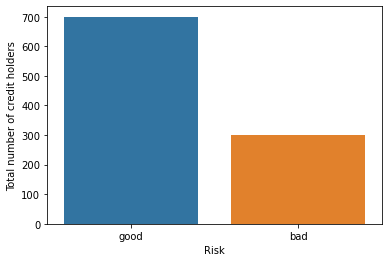

In [16]:
sns.countplot(df['Risk'])
plt.ylabel('Total number of credit holders');

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


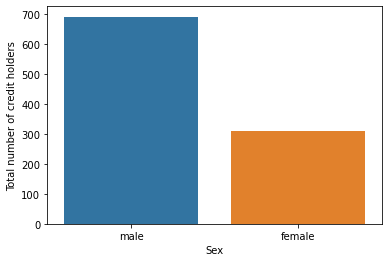

In [17]:
sns.countplot(df['Sex'])
plt.ylabel('Total number of credit holders');

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


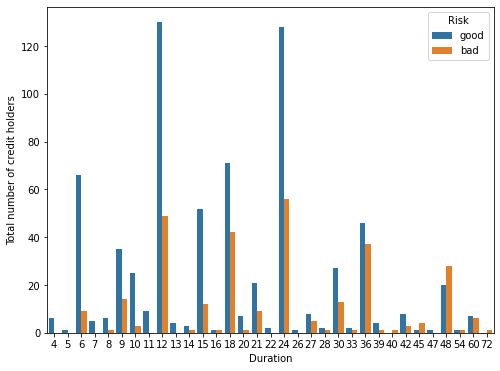

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(df['Duration'],hue=df['Risk'])
plt.ylabel('Total number of credit holders');

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


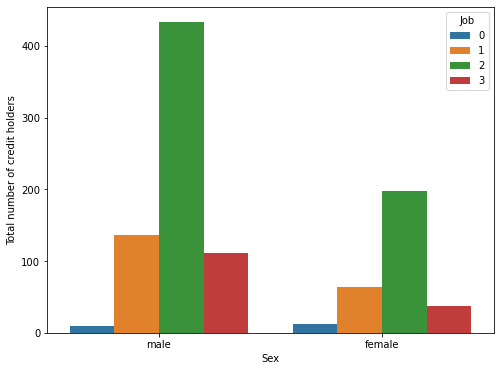

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(df['Sex'],hue=df['Job'])
plt.ylabel('Total number of credit holders');

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


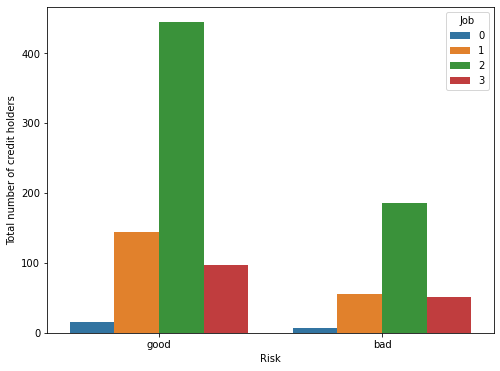

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(df['Risk'],hue=df['Job'])
plt.ylabel('Total number of credit holders');

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


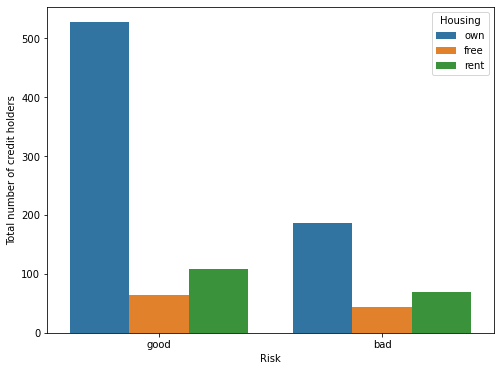

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(df['Risk'],hue=df['Housing'])
plt.ylabel('Total number of credit holders');

Text(0.5, 1.0, 'vacation/others')

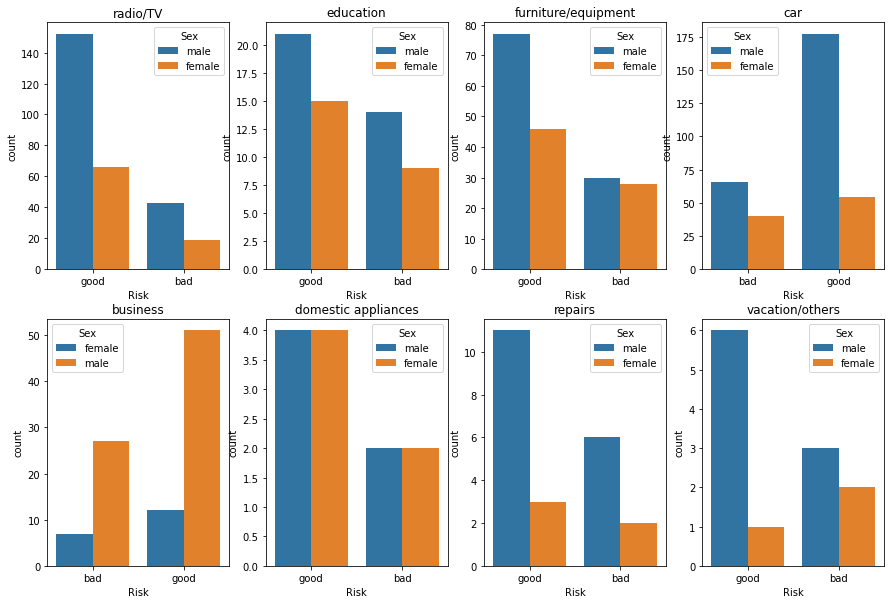

In [22]:
plt.figure(figsize=(15,10))
index1 = df.set_index('Purpose')
plt.subplot(2,4,1)
a = sns.countplot(x = 'Risk', hue = 'Sex', data = index1.loc['radio/TV'])
a.set_title('radio/TV')
plt.subplot(2,4,2)
b = sns.countplot(x = 'Risk', hue = 'Sex', data = index1.loc['education'])
b.set_title('education')
plt.subplot(2,4,3)
c = sns.countplot(x = 'Risk', hue = 'Sex', data = index1.loc['furniture/equipment'])
c.set_title('furniture/equipment')
plt.subplot(2,4,4)
d = sns.countplot(x = 'Risk', hue = 'Sex', data = index1.loc['car'])
d.set_title('car')
plt.subplot(2,4,5)
e = sns.countplot(x = 'Risk', hue = 'Sex', data = index1.loc['business'])
e.set_title('business')
plt.subplot(2,4,6)
f = sns.countplot(x = 'Risk', hue = 'Sex', data = index1.loc['domestic appliances'])
f.set_title('domestic appliances')
plt.subplot(2,4,7)
g = sns.countplot(x = 'Risk', hue = 'Sex', data = index1.loc['repairs'])
g.set_title('repairs')
plt.subplot(2,4,8)
h = sns.countplot(x = 'Risk', hue = 'Sex', data = index1.loc['vacation/others'])
h.set_title('vacation/others')


Text(0.5, 1.0, '3')

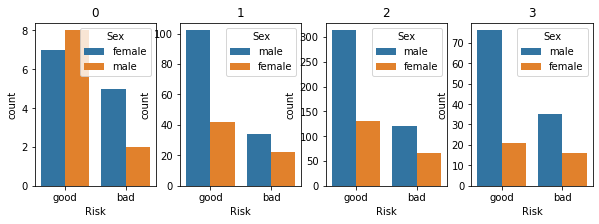

In [23]:
plt.figure(figsize=(10,3))
index2 = df.set_index('Job')
plt.subplot(1,4,1)
a = sns.countplot(x = 'Risk', hue = 'Sex', data = index2.loc[0])
a.set_title('0')
plt.subplot(1,4,2)
b = sns.countplot(x = 'Risk', hue = 'Sex', data = index2.loc[1])
b.set_title('1')
plt.subplot(1,4,3)
c = sns.countplot(x = 'Risk', hue = 'Sex', data = index2.loc[2])
c.set_title('2')
plt.subplot(1,4,4)
d = sns.countplot(x = 'Risk', hue = 'Sex', data = index2.loc[3])
d.set_title('3')

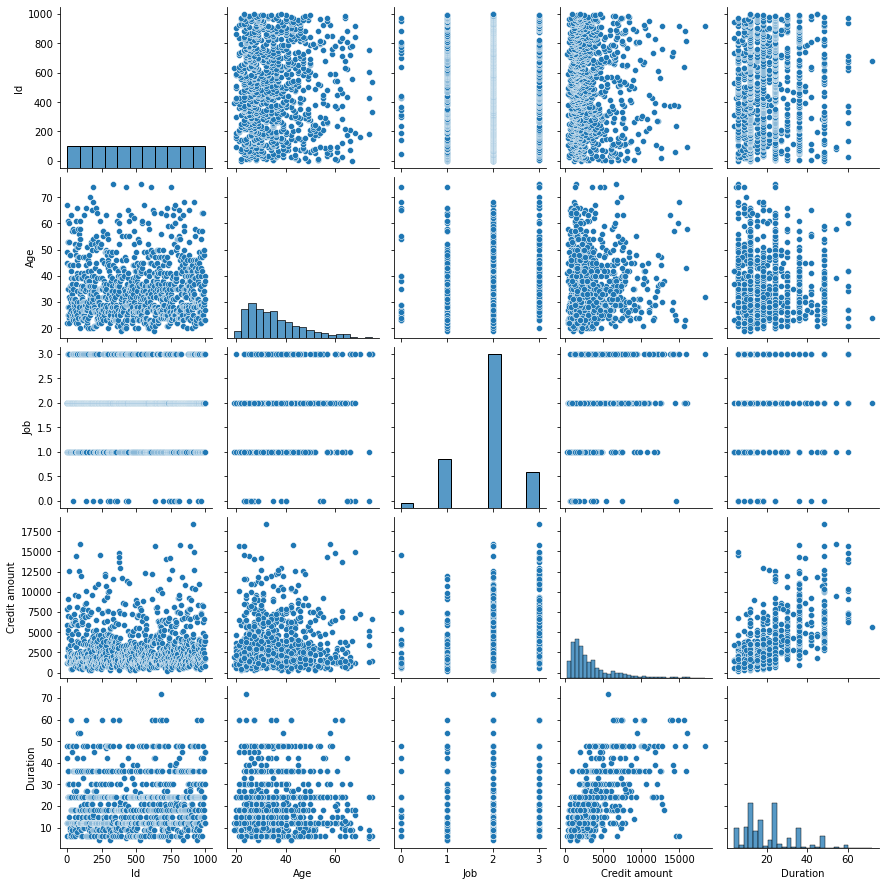

In [24]:
sns.pairplot(df);

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


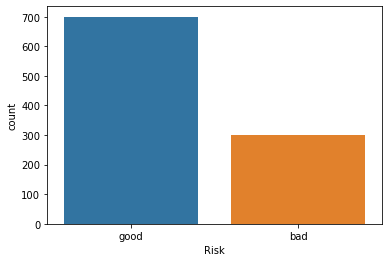

In [25]:
sns.countplot(df['Risk']);

# Preprocess the dataset:
**We have to convert all categorical values into numerical values.**

#### Convert purpose column using Dummy variables

In [26]:
def risk(a):
    if a == 'bad':
        return 0
    else:
        return 1

In [27]:
df['Risk']=df['Risk'].apply(risk)

In [28]:
dummy = pd.get_dummies(df['Purpose'], drop_first = True)
newdf = pd.concat([df, dummy], axis = 1)
newdf.drop(columns = ['Purpose', 'Id'], inplace = True)
newdf.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,male,2,own,Unknown,little,1169,6,1,0,0,0,0,1,0,0
1,22,female,2,own,little,moderate,5951,48,0,0,0,0,0,1,0,0
2,49,male,1,own,little,Unknown,2096,12,1,0,0,1,0,0,0,0
3,45,male,2,free,little,little,7882,42,1,0,0,0,1,0,0,0
4,53,male,2,free,little,little,4870,24,0,1,0,0,0,0,0,0


#### Use label encoding for rest of the categorical data

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
for i in newdf:
    newdf[i]=le.fit_transform(newdf[i])

In [31]:
newdf.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,48,1,2,1,0,1,142,2,1,0,0,0,0,1,0,0


### Check the unique values in the new dataframe

In [32]:
columns=newdf.columns
for i in columns:
    print(f'Unique values in {i} are: {newdf[i].unique()}')

Unique values in Age are: [48  3 30 26 34 16 42  9  6  5 41 13 25 12 29  7 17 20 23 15 44  8 11 38
 14 18 39  4 10 33 31 27 32 22 21 47 28 37 35  1  2 19 50 46 51 49 24 36
 45 52  0 43 40]
Unique values in Sex are: [1 0]
Unique values in Job are: [2 1 3 0]
Unique values in Housing are: [1 0 2]
Unique values in Saving accounts are: [0 1 3 4 2]
Unique values in Checking account are: [1 2 0 3]
Unique values in Credit amount are: [142 770 390 848 734 869 533 813 562 747 190 700 287 149 232 183 464 852
 903 608 401 498 422 322 387 222  10   9 463 808 349 682 768 178 253 725
 776 391 163  15 447 138 781 779 777 230 434 213 821 388 772 177 598 419
  64 797 876 366 783 229 275 364 912 580 746 410 107 325 459 854  51 140
 771 370 270 674 726 875 657 769 157 288 315 438 235 904 425 128  24 233
  67 636 200 919 377 494 448 816 250 441  92 350 468 898 796 775 841 234
 246   8 784 846 307 629 820 399 698 454 329 663 317  63 352 396  44  28
 335 616 861 812 508 373 882 170 863  61 511 340  47 728 60

### Plot heatmap

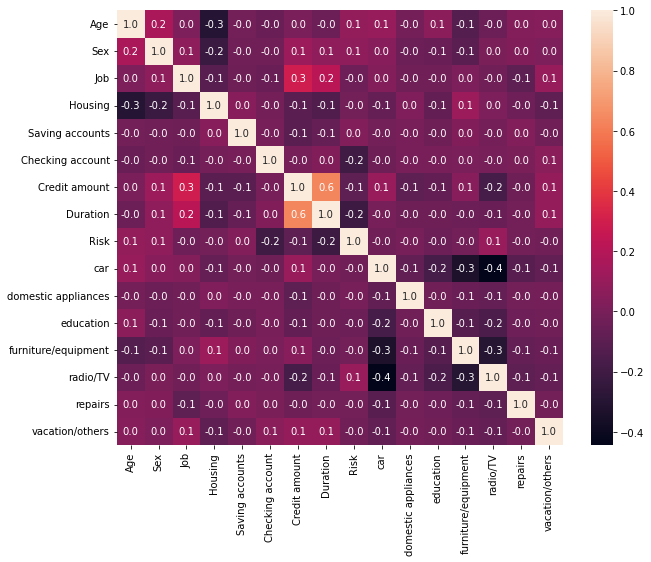

In [33]:
plt.figure(figsize = (10,8))
sns.heatmap(newdf.corr(),annot=True,fmt='.1f');

## Select the Dependent(target) and Independent Variables:

In [34]:
X=newdf.drop(columns=['Risk'])
y=newdf['Risk']

# Standardize the data

In [35]:
from sklearn.preprocessing import StandardScaler


In [36]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,2.788510,0.670280,0.146949,-0.133710,-1.231393,-0.001045,-1.156695,-1.558464,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.197733,-1.491914,0.146949,-0.133710,-0.196609,1.044372,1.217641,2.032467,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,1.194013,0.670280,-1.383771,-0.133710,-0.196609,-1.046463,-0.219059,-0.760479,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,0.839680,0.670280,0.146949,-2.016956,-0.196609,-0.001045,1.512543,1.633475,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,1.548345,0.670280,0.146949,-2.016956,-0.196609,-0.001045,1.081533,0.436498,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208


# Split the data into training and testing set

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

# Models:

## Random Forest Classifier.
** Let's choose the best estimator and parameters :GridSearchCV**

In [38]:
#let's check what params will be best suitable for random forest classification.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [39]:
params={'max_depth': [0.5, 1, 5, 10],'n_estimators': [16, 32, 50, 100], 'n_jobs': [1, 2],'random_state': [1, 10, 20, 42]}

In [40]:
rfc_gsv=GridSearchCV(RandomForestClassifier(),params,scoring='accuracy',cv=5)
rfc_gsv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [0.5, 1, 5, 10],
                         'n_estimators': [16, 32, 50, 100], 'n_jobs': [1, 2],
                         'random_state': [1, 10, 20, 42]},
             scoring='accuracy')

In [42]:
print(f'Best estimator is: {rfc_gsv.best_estimator_}')
print(f'Best parameters are: {rfc_gsv.best_params_}')
print(f'Best score is {rfc_gsv.best_score_}')

Best estimator is: RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=1, random_state=1)
Best parameters are: {'max_depth': 10, 'n_estimators': 50, 'n_jobs': 1, 'random_state': 1}
Best score is 0.744


In [43]:
rfc_model=RandomForestClassifier(max_depth=10,n_jobs=1,random_state=10)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_jobs=1, random_state=10)

### Check the accuracy score, Confusion metrics, Classification report and Cross val score

In [44]:
y_pred=rfc_model.predict(X_test)
print(f'Accuracy score is {accuracy_score(y_test,y_pred)}')
print(f'Confusion metrics \n {confusion_matrix(y_test,y_pred)}')
print(f'Classification report: \n {classification_report(y_test,y_pred)}')
print(f"Cross val score: {cross_val_score(RandomForestClassifier(),X,y,scoring='accuracy',cv=5).mean()}")

Accuracy score is 0.76
Confusion metrics 
 [[ 21  35]
 [ 13 131]]
Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.38      0.47        56
           1       0.79      0.91      0.85       144

    accuracy                           0.76       200
   macro avg       0.70      0.64      0.66       200
weighted avg       0.74      0.76      0.74       200

Cross val score: 0.738


#### Visualize the confusion matrix

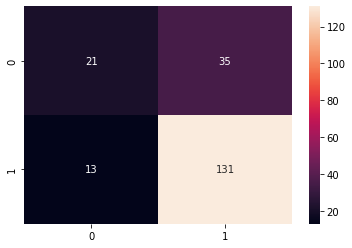

In [45]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d');

## SupportVectorClassifier:

In [46]:
from sklearn.svm import SVC
svc_params={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc_gsv=GridSearchCV(SVC(),svc_params,scoring='accuracy',cv=5)
svc_gsv.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [47]:
print(f'Best estimator is: {svc_gsv.best_estimator_}')
print(f'Best parameters are: {svc_gsv.best_params_}')
print(f'Best score is {svc_gsv.best_score_}')

Best estimator is: SVC(C=0.75)
Best parameters are: {'C': 0.75, 'degree': 3, 'kernel': 'rbf'}
Best score is 0.7130000000000001


In [48]:
svc_model=SVC(C=0.75,degree=3,kernel='rbf')
svc_model.fit(X_train,y_train)

SVC(C=0.75)

In [49]:
y_pred=svc_model.predict(X_test)
print(f'Accuracy score is {accuracy_score(y_test,y_pred)}')
print(f'Confusion metrics \n {confusion_matrix(y_test,y_pred)}')
print(f'Classification report: \n {classification_report(y_test,y_pred)}')
print(f"Cross val score: {cross_val_score(SVC(),X,y,scoring='accuracy',cv=5).mean()}")

Accuracy score is 0.73
Confusion metrics 
 [[  5  51]
 [  3 141]]
Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.09      0.16        56
           1       0.73      0.98      0.84       144

    accuracy                           0.73       200
   macro avg       0.68      0.53      0.50       200
weighted avg       0.70      0.73      0.65       200

Cross val score: 0.71


## LogisticRegression

In [50]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred=lr_model.predict(X_test)
print(f'Accuracy score is {accuracy_score(y_test,y_pred)}')
print(f'Confusion metrics \n {confusion_matrix(y_test,y_pred)}')
print(f'Classification report: \n {classification_report(y_test,y_pred)}')
print(f"Cross val score: {cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=5).mean()}")

Accuracy score is 0.72
Confusion metrics 
 [[ 10  46]
 [ 10 134]]
Classification report: 
               precision    recall  f1-score   support

           0       0.50      0.18      0.26        56
           1       0.74      0.93      0.83       144

    accuracy                           0.72       200
   macro avg       0.62      0.55      0.55       200
weighted avg       0.68      0.72      0.67       200

Cross val score: 0.709


## AdaBoost: Classifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier
adb_model=AdaBoostClassifier()
adb_model.fit(X_train,y_train)


AdaBoostClassifier()

In [53]:
y_pred=adb_model.predict(X_test)
print(f'Accuracy score is {accuracy_score(y_test,y_pred)}')
print(f'Confusion metrics \n {confusion_matrix(y_test,y_pred)}')
print(f'Classification report: \n {classification_report(y_test,y_pred)}')
print(f"Cross val score: {cross_val_score(AdaBoostClassifier(),X,y,scoring='accuracy',cv=5).mean()}")

Accuracy score is 0.735
Confusion metrics 
 [[ 22  34]
 [ 19 125]]
Classification report: 
               precision    recall  f1-score   support

           0       0.54      0.39      0.45        56
           1       0.79      0.87      0.83       144

    accuracy                           0.73       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.72      0.73      0.72       200

Cross val score: 0.728


#### View scores of the different models 

In [54]:
scores={'Models':['Random Forest Classifier','Logistic Regression','Gradient Boost Classifier','Support Vector Classifier'],'Score':[cross_val_score(RandomForestClassifier(),X,y,scoring='accuracy',cv=5).mean(),cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=5).mean(),cross_val_score(AdaBoostClassifier(),X,y,scoring='accuracy',cv=5).mean(),cross_val_score(SVC(),X,y,scoring='accuracy',cv=5).mean()]}
pd.DataFrame(scores).sort_values('Score',ascending=False)

,Models,Score
0,Random Forest Classifier,0.734
2,Gradient Boost Classifier,0.728
3,Support Vector Classifier,0.710
1,Logistic Regression,0.709


## ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**

* False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
* False Negative, means they will pay the loan(Risk:No), but the model said they won't.

**In my opinion:**

* Length of the dataset isn't enough, we need more data for better accuracy.

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)
Step 0: Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [55]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit(X_train,y_train)

PCA(n_components=5)

In [56]:
pca.n_components_

5

In [58]:
#Apply the mapping (transform) to both the training set and the test set.
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

**Step 1: Import the model you want to use**

In sklearn, all machine learning models are implemented as Python classes

In [59]:
from sklearn.linear_model import LogisticRegression


**Step 2: Make an instance of the Model**

In [60]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [61]:
logisticRegr.fit(X_train,y_train)

LogisticRegression()

In [62]:
logisticRegr.score(X_train,y_train)

0.71

In [63]:
#Confusion Matrix
y_pred=logisticRegr.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 10,  46],
       [ 10, 134]], dtype=int64)

In [64]:
accuracy_score(y_test,y_pred)

0.72

## Model Deployment With Tkinter

### Import Tkinter Library

In [67]:
from tkinter import *
from tkinter.ttk import Combobox

### Define a function that will return the output of our prediction in an Entry box in tkinter window

In [68]:
def Prediction():
    age=int(age_combo.get())
    
    sex=sex_combo.get()
    if sex=='Male':
        sex=1
    else:
        sex=0
        
        
    job=job_combo.get()
    if job=='Unskilled and non-resident':
        job=0
    elif job=='Unskilled and resident':
        job=1
    elif job=='Skilled':
        job=2
    else:
        job=3
        
        
    housing=housing_combo.get()
    if housing=='Own':
        housing=0
    elif housing=='Free':
        housing=1
    else:
        housing=2
        
        
    saving=saving_combo.get()
    if saving=='Little':
        saving=0
    elif saving=='Quiet rich':
        saving=1
    elif saving=='Rich':
        saving=2
    elif saving=='Moderate':
        saving=3
    else:
        saving=4
        
        
    checking=checking_combo.get()
    if checking=='Little':
        checking=0
    elif checking=='Moderate':
        checking=1
    elif checking=='Rich':
        checking=2
    else:
        checking=3
        
    credit=int(credit_entry.get())
    duration=int(duration_entry.get())
    
    purpose=purpose_combo.get()
    if purpose=='Radio/TV':
        radio=1
        education=0
        furniture=0
        car=0
        business=0
        appliances=0
        repairs=0
        vacation=0
        
    elif purpose=='Education':
        radio=0
        education=1
        furniture=0
        car=0
        business=0
        appliances=0
        repairs=0
        vacation=0
        
    elif purpose=='Furniture/equipment':
        radio=0
        education=0
        furniture=1
        car=0
        business=0
        appliances=0
        repairs=0
        vacation=0
        
    elif purpose=='Car':
        radio=0
        education=0
        furniture=0
        car=1
        business=0
        appliances=0
        repairs=0
        vacation=0
    elif purpose=='Business':
        radio=0
        education=0
        furniture=0
        car=0
        business=1
        appliances=0
        repairs=0
        vacation=0
        
    elif purpose=='Domestic appliances':
        radio=0
        education=0
        furniture=0
        car=0
        business=0
        appliances=1
        repairs=0
        vacation=0
        
    elif purpose=='Repairs':
        radio=0
        education=0
        furniture=0
        car=0
        business=0
        appliances=0
        repairs=1
        vacation=0
    else:
        radio=0
        education=0
        furniture=0
        car=0
        business=0
        appliances=0
        repairs=0
        vacation=1
        
    X=[[age, sex, job, housing, saving, checking, credit, duration, car, furniture, radio, appliances, repairs, education, vacation]]
    
    X=scaler.transform(X)
    
    prediction=logisticRegr.predict(X)[0]
    if prediction == 0:
        prediction = 'Risk : Bad'
    else:
        prediction = 'Risk : Good'
    prediction_entry.delete(0,END)
    prediction_entry.insert(0,prediction)

### Create Tkinter window and all necessary input and output boxes

In [ ]:
window=Tk()
window.title('German Credit Risk Analysis')
window.geometry('550x550')

age_label=Label(window,text='Age').pack()
age_combo=Combobox(window)
age_combo['values']=(list(range(18,81)))
age_combo.pack()

sex_label=Label(window,text='Sex').pack()
sex_combo=Combobox(window)
sex_combo['values']=('Male','Female')
sex_combo.pack()

job_label=Label(window,text='Job').pack()
job_combo=Combobox(window)
job_combo['values']=('Unskilled and non-resident', 'Unskilled and resident', 'Skilled', 'Highly skilled')
job_combo.pack()

housing_label=Label(window,text='Housing').pack()
housing_combo=Combobox(window)
housing_combo['values']=('Own','Free','Rent')
housing_combo.pack()


saving_label=Label(window,text='Saving account').pack()
saving_combo=Combobox(window)
saving_combo['values']=('Little', 'Quite rich', 'Rich', 'Moderate','Unknown')
saving_combo.pack()

checking_label=Label(window,text='Checking amount').pack()
checking_combo=Combobox(window)
checking_combo['values']=('Little', 'Moderate', 'Rich', 'Unknown')
checking_combo.pack()

credit_label=Label(window,text='Credit amount').pack()
credit_entry=Entry(window)
credit_entry.pack()

duration_label=Label(window,text='Duration(in months)').pack()
duration_entry=Entry(window)
duration_entry.pack()

purpose_label=Label(window,text='Purpose').pack()
purpose_combo=Combobox(window)
purpose_combo['values']=('Radio/TV', 'Education', 'Furniture/equipment', 'Car', 'Business','Domestic appliances', 'Repairs', 'Vacation/others')
purpose_combo.pack()

predict_button=Button(window,text='Predict',command=Prediction)
predict_button.pack()

prediction_entry=Entry(window)
prediction_entry.pack()

window.mainloop()

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does no

***

# <span style = "color:coral"> Great Job!  You Have Succesfully deployed your ML Model</span>